In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import os
import csv
from datetime import datetime
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Models Estimation

In [63]:
path = '/content/drive/MyDrive/Virtual env/z_inhomogenous_modeling/eco_181229_data_all/'
print(len(sorted(os.listdir(path))))
rnd_idx = np.array( [2, 8, 25, 28, 31, 40, 48, 51, 55, 59, 63, 71, 75, 89, 96, 123, 132, 150, 172, 183, 130, 121, 200,143,146,103,192,151,119,162,14,6,145] )
len(rnd_idx)

800


33

In [64]:
y = np.array(pd.read_csv(path+f'{rnd_idx[0]}_percep_force_ecoflex_181229_data.csv'))
x = np.array(pd.read_csv(path+f'{rnd_idx[0]}_percep_pos_ecoflex_181229_data.csv'))
l = len(y)
x.shape, y.shape

((1068, 12), (1068, 1))

In [65]:
for i in range(len(rnd_idx)-1):
    x1 = np.array(pd.read_csv(path+f'{rnd_idx[i+1]}_percep_pos_ecoflex_181229_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{rnd_idx[i+1]}_percep_force_ecoflex_181229_data.csv'))

    x = np.concatenate([x,x1])
    y = np.concatenate([y,y1])
print(x.shape, y.shape)

(38671, 12) (38671, 1)


In [66]:
y_test = np.array(pd.read_csv(path+f'{rnd_idx[3]-2}_force_ecoflex_181229_data.csv'))
x_test = np.array(pd.read_csv(path+f'{rnd_idx[3]-2}_pos_ecoflex_181229_data.csv'))

x_test.shape, y_test.shape

((34487, 12), (34487, 1))

In [67]:
for i in range(len(rnd_idx)//2):
    x1 = np.array(pd.read_csv(path+f'{rnd_idx[i+1]-1}_pos_ecoflex_181229_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{rnd_idx[i+1]-1}_force_ecoflex_181229_data.csv'))
    x_test = np.concatenate([x_test,x1])
    y_test = np.concatenate([y_test,y1])
print(x_test.shape, y_test.shape)

(586307, 12) (586307, 1)


In [ ]:
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x,y)
t2 = datetime.now()
y_pred = cat.predict(x_test)

In [69]:
print('RMSE:', mean_squared_error(y_pred, y_test)**0.5)
print(t2-t1)

RMSE: 0.24858007148475267
0:00:11.228090


In [70]:
for i in range(81,90):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181229_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181229_data.csv'))
    y_pred = cat.predict(x1)
    print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')

For point: 81, Error: 0.3967406473329552
For point: 82, Error: 0.4311431377379083
For point: 83, Error: 0.398000370696419
For point: 84, Error: 0.3361556444924757
For point: 85, Error: 0.18373726997291112
For point: 86, Error: 0.16330700150980487
For point: 87, Error: 0.34003981738161104
For point: 88, Error: 0.4594364755941114
For point: 89, Error: 0.1655829790950411


In [75]:
error = []
for i in range(1,201):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181229_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181229_data.csv'))
    y_pred = cat.predict(x1)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('results_catboost.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))

0.20247829039312967


In [72]:
print(np.std(np.array(error)))
max(error), min(error)

0.10799914127177025


(0.4952943228648564, 0.07621167287526985)

In [73]:
for i in range(5):
    val = sorted(error)[::-1][i]
    print(val, 'at', error.index(val)+1)


0.4952943228648564 at 133
0.48185888971637586 at 100
0.4734340098193974 at 46
0.47217456754298026 at 111
0.46839409322070263 at 157


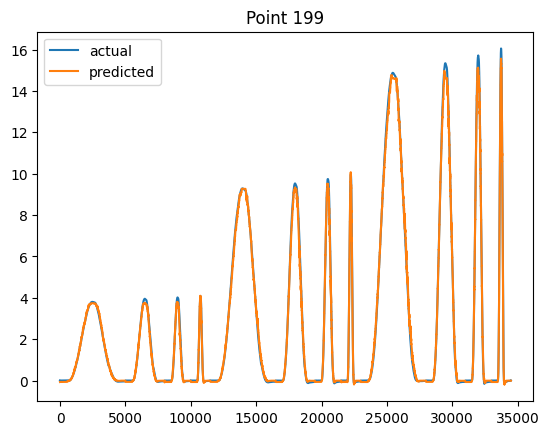

In [74]:
def graph(i):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181229_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181229_data.csv'))
    y_pred = cat.predict(x1)
    plt.plot(range(len(y1)), y1, label = 'actual')
    plt.plot(range(len(y1)), y_pred, label = 'predicted')
    plt.legend()
    plt.title(f'Point {i}')
    plt.show()

graph(199)

# Random Forest

In [76]:
rf = RandomForestRegressor()
t1 = datetime.now()
rf.fit(x,y)
t2 = datetime.now()
y_pred = rf.predict(x_test)
print('RMSE:', mean_squared_error(y_pred, y_test)**0.5)
print(t2-t1)

RMSE: 0.5220782625117577
0:00:52.386142


In [77]:
for i in range(74,82):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181229_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181229_data.csv'))
    y_pred = rf.predict(x1)
    print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')

For point: 74, Error: 0.20668364285908908
For point: 75, Error: 0.12283027159474626
For point: 76, Error: 0.2221463255357285
For point: 77, Error: 0.40709554469806847
For point: 78, Error: 0.23410031074086288
For point: 79, Error: 0.12483637184196684
For point: 80, Error: 0.31561956514346345
For point: 81, Error: 0.42712996201986


In [78]:
error = []
for i in range(1,201):
    x1 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181229_data.csv')) # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181229_data.csv'))
    y_pred = rf.predict(x1)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('results_RF.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))

0.32981004156599547


In [79]:
print(sum(error)/len(error))
print(np.std(np.array(error)))
max(error), min(error)

0.32981004156599547
0.24390831996473128


(1.3708750582910176, 0.06225088408159593)

# Clusterring

In [80]:
path2 = '/content/drive/MyDrive/Virtual env/z_inhomogenous_modeling/'
arr = np.array(pd.read_csv(path2+'x_y_181229.csv', names = ['x','y']))
print(arr.shape)
arr[:5]

(200, 2)


array([[-0.0001, -0.0021],
       [-0.0003, -0.0001],
       [-0.0006,  0.014 ],
       [-0.0009, -0.0123],
       [-0.001 ,  0.0025]])

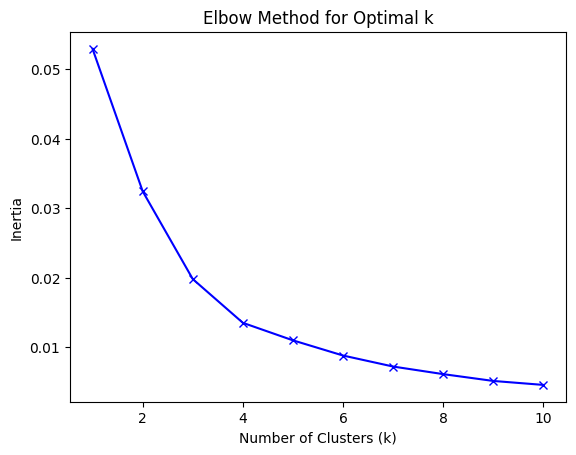

In [81]:
from sklearn.cluster import KMeans
k_values = range(1, 11)

# Perform k-means clustering for each k value
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(arr)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [82]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(arr)
kmeans.cluster_centers_

array([[-0.01043654, -0.01130769],
       [ 0.01323947,  0.01066053],
       [-0.01124211,  0.01231316],
       [ 0.01083158, -0.00967368],
       [ 0.00113529,  0.00106765]])

In [83]:
from collections import defaultdict
d = defaultdict(lambda: [])
for i in range(200):
    label = kmeans.predict([arr[i]])[0]
    d[label].append(i)

for i in range(5):
    print(d[i])

[3, 8, 9, 13, 15, 16, 17, 18, 19, 25, 26, 27, 31, 33, 35, 38, 40, 42, 43, 44, 45, 47, 53, 54, 56, 57, 58, 59, 60, 61, 62, 65, 66, 68, 70, 71, 72, 76, 79, 80, 81, 82, 83, 86, 87, 91, 92, 93, 94, 99, 101, 102]
[114, 116, 120, 129, 130, 140, 146, 148, 150, 152, 154, 157, 158, 159, 160, 161, 162, 164, 167, 169, 170, 175, 177, 179, 181, 182, 184, 185, 186, 188, 189, 190, 191, 192, 194, 196, 197, 198]
[2, 7, 14, 22, 23, 24, 28, 29, 30, 34, 36, 37, 41, 46, 49, 50, 51, 52, 55, 63, 64, 67, 69, 73, 74, 75, 77, 78, 84, 85, 88, 89, 90, 95, 96, 97, 98, 103]
[104, 110, 111, 123, 125, 126, 127, 128, 132, 135, 136, 141, 142, 143, 144, 145, 147, 149, 151, 153, 155, 156, 163, 165, 166, 168, 171, 172, 173, 174, 176, 178, 180, 183, 187, 193, 195, 199]
[0, 1, 4, 5, 6, 10, 11, 12, 20, 21, 32, 39, 48, 100, 105, 106, 107, 108, 109, 112, 113, 115, 117, 118, 119, 121, 122, 124, 131, 133, 134, 137, 138, 139]


In [84]:
from scipy.linalg import norm

def dist(i):
    at = -1
    mini = 10
    for j in range(len(d[i])):
        dis = ((arr[d[i][j]][0]- kmeans.cluster_centers_[i][0])**2 + (arr[d[i][j]][1]- kmeans.cluster_centers_[i][1])**2)**0.5
        if dis <mini:
            mini = dis
            at = j
    print(f'{d[i][at]+1} is the master node of {i}th cluster')
    print(arr[d[i][at]], kmeans.cluster_centers_[i],'\n')
for i in range(5):
    dist(i)

55 is the master node of 0th cluster
[-0.0108 -0.0112] [-0.01043654 -0.01130769] 

162 is the master node of 1th cluster
[0.0122 0.0114] [0.01323947 0.01066053] 

50 is the master node of 2th cluster
[-0.0098  0.0131] [-0.01124211  0.01231316] 

148 is the master node of 3th cluster
[ 0.01   -0.0098] [ 0.01083158 -0.00967368] 

108 is the master node of 4th cluster
[0.0014 0.    ] [0.00113529 0.00106765] 



In [85]:
x1 = np.array(pd.read_csv(path+f'{55}_pos_ecoflex_181229_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{55}_force_ecoflex_181229_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[0])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181229_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181229_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total = error

0.5974288145878096
1.4265925619908217 0.0185913020003985


In [86]:
x1 = np.array(pd.read_csv(path+f'{162}_pos_ecoflex_181229_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{162}_force_ecoflex_181229_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[1])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181229_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181229_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total += error

0.46287743266883175
1.08359379878301 0.019763119832188845


In [87]:
x1 = np.array(pd.read_csv(path+f'{50}_pos_ecoflex_181229_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{50}_force_ecoflex_181229_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[2])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181229_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181229_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total += error

0.5692213499836245
1.3144388633990662 0.019530855655112443


In [88]:
x1 = np.array(pd.read_csv(path+f'{148}_pos_ecoflex_181229_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{148}_force_ecoflex_181229_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[3])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181229_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181229_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total+= error

0.5402800333672959
1.0377768744494853 0.01593158698945423


In [89]:
x1 = np.array(pd.read_csv(path+f'{108}_pos_ecoflex_181229_data.csv'))[:,:10] # fractional derivatives
y1 = np.array(pd.read_csv(path+f'{108}_force_ecoflex_181229_data.csv'))
rf = RandomForestRegressor()
rf.fit(x1,y1)

error = []
array = np.array(d[4])+1
for i in array:
    x2 = np.array(pd.read_csv(path+f'{i}_pos_ecoflex_181229_data.csv'))[:,:10] # fractional derivatives
    y1 = np.array(pd.read_csv(path+f'{i}_force_ecoflex_181229_data.csv'))
    y_pred = rf.predict(x2)
    statement = f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}\n'
    #print(f'For point: {i}, Error: {mean_squared_error(y_pred, y1)**0.5}')
    error.append(mean_squared_error(y_pred, y1)**0.5)
    with open('cluster.txt','a') as f:
        f.write(statement)
print(sum(error)/len(error))
print(max(error), min(error))
total += error

0.20880950806972143
0.9358676876211592 0.011041579982412423


In [90]:
print('Mean:', np.mean(np.array(total)))
print('Std:', np.std(np.array(total)))

Mean: 0.489581083208436
Std: 0.3063564695083441


In [91]:
max(total)

1.4265925619908217